In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [72]:
loan=pd.read_csv('loan.csv',low_memory=False)

In [73]:
loan.shape

(887379, 74)

### Check NA values and remove features with high number of NAs

In [74]:
loan.isnull().sum(axis=0)

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51457
emp_length                          0
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761350
purpose                             0
title                             151
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [75]:
loan.shape[0]-loan.isnull().sum(axis=0) ## count of real values in each column

id                             887379
member_id                      887379
loan_amnt                      887379
funded_amnt                    887379
funded_amnt_inv                887379
term                           887379
int_rate                       887379
installment                    887379
grade                          887379
sub_grade                      887379
emp_title                      835922
emp_length                     887379
home_ownership                 887379
annual_inc                     887375
verification_status            887379
issue_d                        887379
loan_status                    887379
pymnt_plan                     887379
url                            887379
desc                           126029
purpose                        887379
title                          887228
zip_code                       887379
addr_state                     887379
dti                            887379
delinq_2yrs                    887350
earliest_cr_

In [76]:
df=loan.copy()
df.dropna(axis=1,thresh=869800,inplace=True) 
## axis=0 means dropping row, axis=1 dropna in column, threshold is # of good values

In [77]:
loan.shape

(887379, 74)

In [78]:
df.shape

(887379, 47)

In [79]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,861.07,0.00,0.00,0.00,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,603.65,0.00,0.00,0.00,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,2209.33,16.97,0.00,0.00,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,1009.07,0.00,0.00,0.00,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0


In [80]:
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      4
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                         151
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                    29
earliest_cr_line               29
inq_last_6mths                 29
open_acc                       29
pub_rec                        29
revol_bal                       0
revol_util    

In [11]:
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
num_cols= df.dtypes.pipe(lambda x: x[x == 'float64']).index

### inspect categorical columns, notice some columns are useless for the prediction target.
 eg.url,zip_code,title,earliest_cr_line,last_credit_pull_d
 since they have unique values in almost each row, so they will be removed.

In [12]:
df[char_cols]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d,application_type
0,36 months,B,B2,10+ years,RENT,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-1985,f,Jan-2016,INDIVIDUAL
1,60 months,C,C4,< 1 year,RENT,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-1999,f,Sep-2013,INDIVIDUAL
2,36 months,C,C5,10+ years,RENT,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-2001,f,Jan-2016,INDIVIDUAL
3,36 months,C,C1,10+ years,RENT,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-1996,f,Jan-2015,INDIVIDUAL
4,60 months,B,B5,1 year,RENT,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-1996,f,Jan-2016,INDIVIDUAL
5,36 months,A,A4,3 years,RENT,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-2004,f,Sep-2015,INDIVIDUAL
6,60 months,C,C5,8 years,RENT,Not Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Loan,280xx,NC,Jul-2005,f,Jan-2016,INDIVIDUAL
7,36 months,E,E1,9 years,RENT,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,car,Car Downpayment,900xx,CA,Jan-2007,f,Dec-2014,INDIVIDUAL
8,60 months,F,F2,4 years,OWN,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,Apr-2004,f,Aug-2012,INDIVIDUAL
9,60 months,B,B5,< 1 year,RENT,Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,other,Building my credit history.,774xx,TX,Sep-2004,f,Mar-2013,INDIVIDUAL


In [13]:
df.purpose.value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

In [14]:
df.pymnt_plan.value_counts()

n    887369
y        10
Name: pymnt_plan, dtype: int64

In [15]:
df.addr_state.value_counts()

CA    129517
NY     74086
TX     71138
FL     60935
IL     35476
NJ     33256
PA     31393
OH     29631
GA     29085
VA     26255
NC     24720
MI     22985
MD     21031
MA     20593
AZ     20412
WA     19434
CO     18807
MN     15957
MO     14207
IN     13789
CT     13531
TN     12887
NV     12443
WI     11574
AL     11200
OR     10893
SC     10639
LA     10587
KY      8550
OK      8085
KS      7926
AR      6640
UT      6264
NM      4939
HI      4570
WV      4386
NH      4294
RI      3893
MS      3819
MT      2558
DE      2511
DC      2432
AK      2205
WY      2028
SD      1815
VT      1797
NE      1176
ME       525
ND       479
IA        14
ID        12
Name: addr_state, dtype: int64

(array([      0.,   20000.,   40000.,   60000.,   80000.,  100000.,
         120000.,  140000.]), <a list of 8 Text yticklabel objects>)

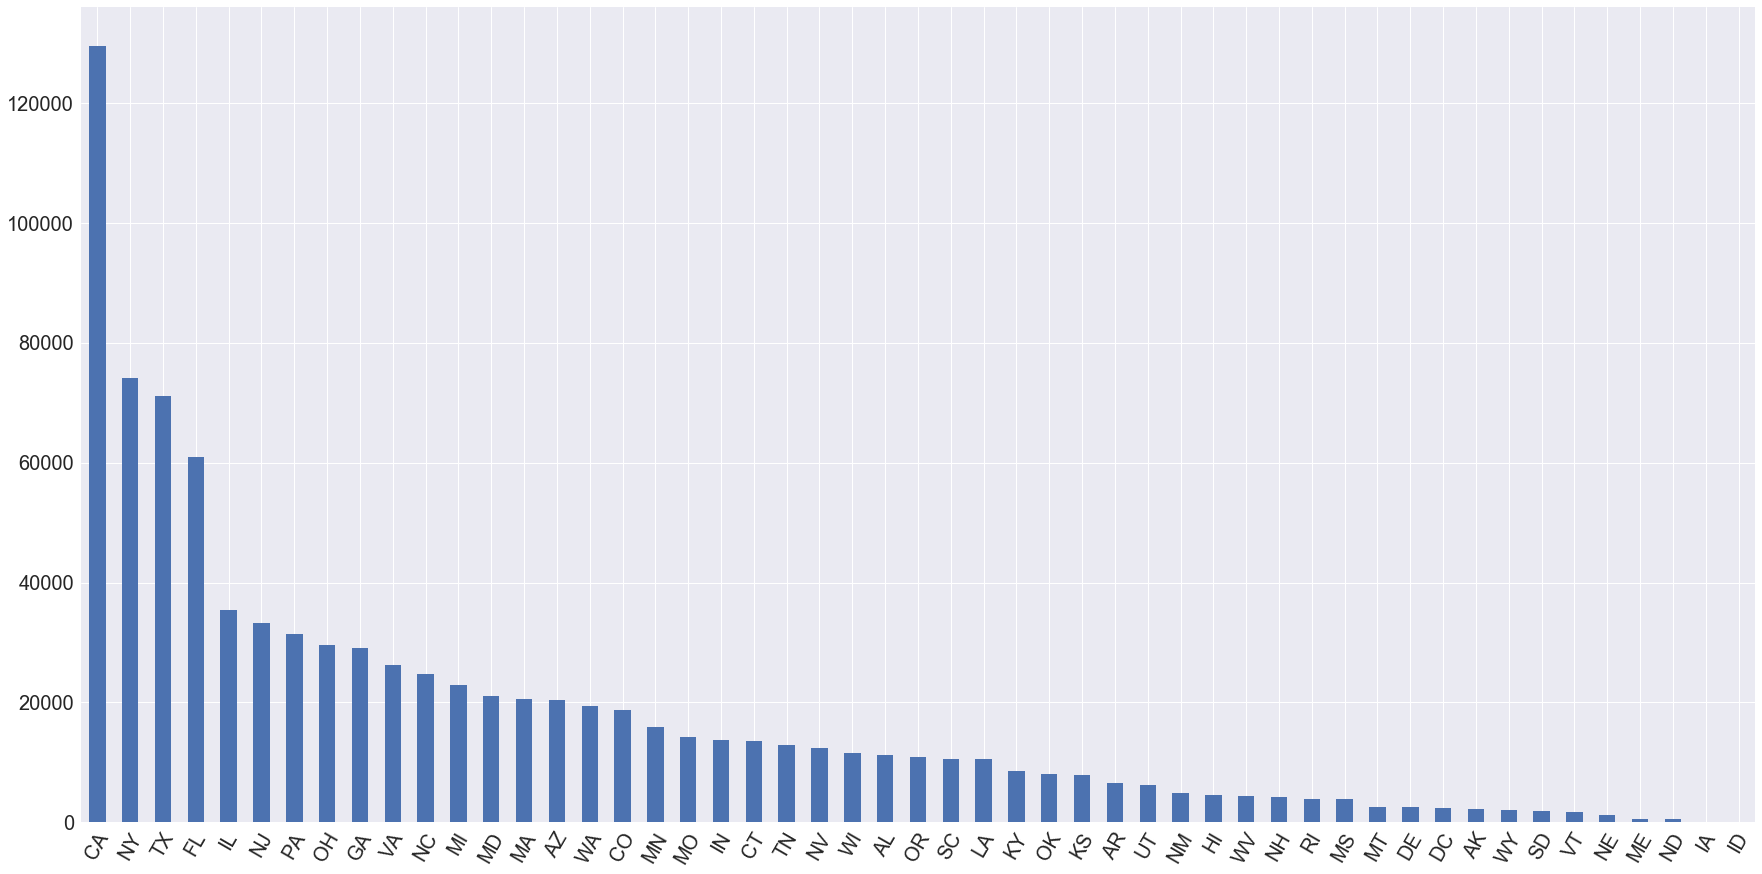

In [16]:
fig = plt.figure(figsize = (30,15));
df.addr_state.value_counts().plot.bar()
plt.xticks(fontsize=20, rotation=60)
plt.yticks(fontsize=20)


### inspect numeric columns
* notice some columns have almost the same value in each row. eg. loan_amnt, funded_amnt and funded_amnt_inv
in this case, only one of the loan amount field needs to be kept to avoid multicollinearity.
* pollicy_code have only one value in all the rows. thus will be removed 
* 'out_prncp', 'out_prncp_inv' have the same value in every single row too. only need to keep one of them.

In [17]:
num_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq'],
      dtype='object')

In [18]:
df.loc[(df['loan_amnt']!=df['funded_amnt'] )& (df['funded_amnt']!=df['funded_amnt_inv']),\
       ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].shape

(1675, 3)

* only 1675 rows out of 887k records have different values in 'loan_amnt', 'funded_amnt', 'funded_amnt_inv'
  can keep only loan_amnt

In [19]:
df[['out_prncp', 'out_prncp_inv']].tail(30) ## two features are all the same, can just keep one of them

,out_prncp,out_prncp_inv
887349,13792.10,13792.10
887350,8758.52,8758.52
887351,0.00,0.00
887352,10583.21,10583.21
887353,12641.60,12641.60
887354,4342.24,4342.24
887355,18689.12,18689.12
887356,19705.00,19705.00
887357,16157.04,16157.04
887358,21451.02,21451.02


In [23]:
df.loc[df['out_prncp'] !=df['out_prncp_inv']].shape

(54001, 47)

In [24]:
df.collections_12_mths_ex_med.value_counts()

0.0     875553
1.0      10824
2.0        732
3.0         88
4.0         23
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [25]:
df.policy_code.value_counts()

1.0    887379
Name: policy_code, dtype: int64

In [26]:
df.acc_now_delinq.value_counts()

0.0     883236
1.0       3866
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

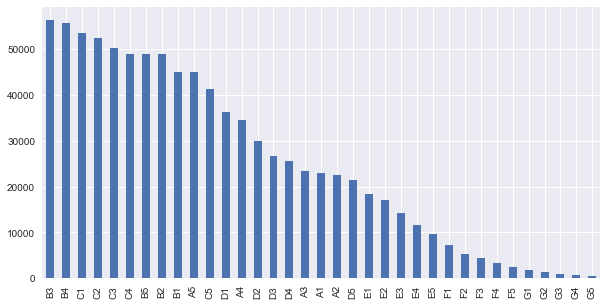

In [27]:
fig = plt.figure(figsize = (10,5));
df.sub_grade.value_counts().plot.bar()

### preliminary check of skewed features

In [28]:
check_skewed=['annual_inc', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_util', 
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 
       'collections_12_mths_ex_med',  'acc_now_delinq',
       'loan_amnt',  'installment', 'revol_bal',
       'total_acc', 'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 
       'last_pymnt_amnt']


In [30]:
def distribution(data,list_cols):
    """
    check skewed distributions of features
    """
    # Create figure
    fig = plt.figure(figsize = (30,100));
    n=len(list_cols)
    # Skewed feature plotting
    for i, feature in enumerate(list_cols):
        ax = fig.add_subplot(n, 2, i+1)
        ax.hist(data[feature].dropna(),bins=80, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 20)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")

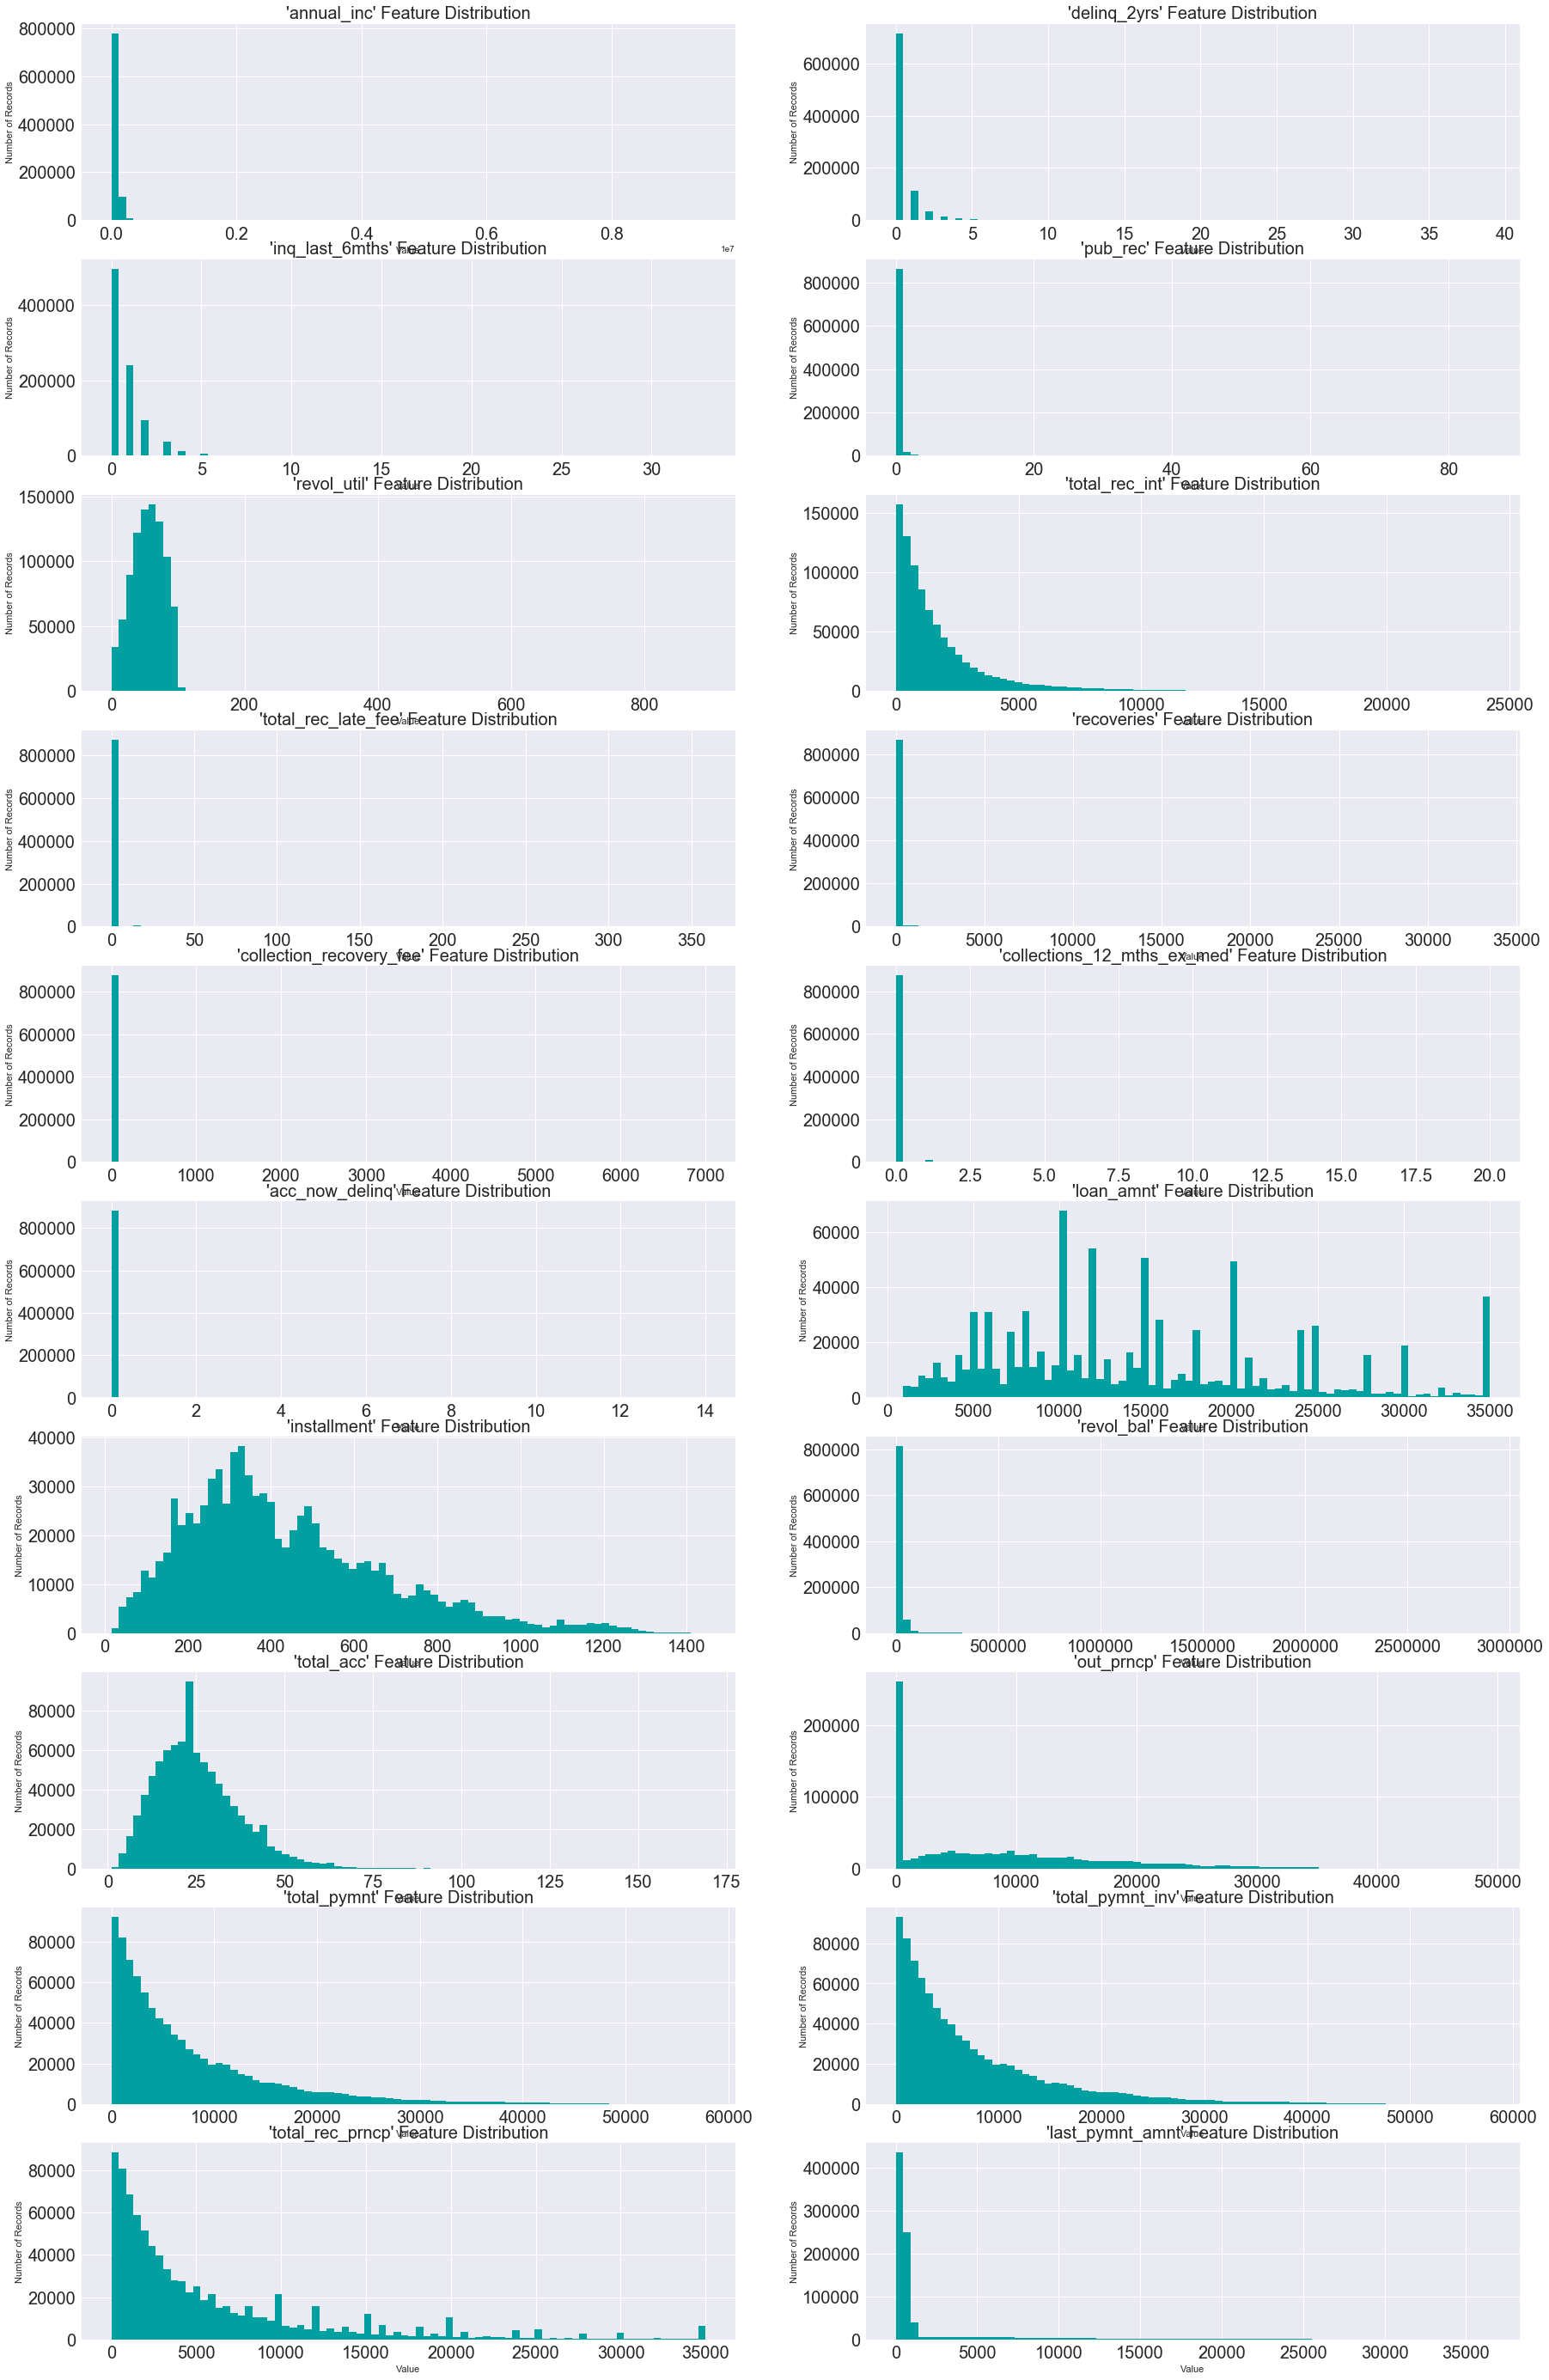

In [31]:
distribution(df,check_skewed)
## the histogram shows most numerical cols in the initial check_skewed list is skewed except revol_util, loan_amnt, 
## total_acct and installment

In [16]:
char_cols

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [17]:
num_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq'],
      dtype='object')

In [81]:
delete_cols=['id','member_id','url','title', 'zip_code', 'addr_state','earliest_cr_line',
             'issue_d','last_credit_pull_d','pymnt_plan','policy_code',
            'funded_amnt', 'funded_amnt_inv','out_prncp_inv'
            ]

In [82]:
df2=pd.DataFrame(df, columns=[i for i in df.columns if i not in delete_cols] )

In [83]:
df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq
0,5000.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,INDIVIDUAL,0.0
1,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,INDIVIDUAL,0.0
2,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,INDIVIDUAL,0.0
3,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,INDIVIDUAL,0.0
4,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,INDIVIDUAL,0.0


### Prepare target variable "loan_status" by combining different levels into binary (0= good loans, 1= bad loans)
### loan_status in ('current', 'issued') should be excluded for training since they are either bad or good. Those records can be used as a separate test set after training the model.

In [84]:
df2['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

** standardize the string values in loan_status. 

In [85]:
df2.loc[df2['loan_status']=='Does not meet the credit policy. Status:Fully Paid','loan_status']='Fully Paid'
df2.loc[df2['loan_status']=='Does not meet the credit policy. Status:Charged Off','loan_status']='Charged Off'

In [86]:
df2['loan_status'].value_counts()

Current               601779
Fully Paid            209711
Charged Off            46009
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

In [91]:
## move loan_status= current/issued to a separate dataframe for future test use as unseen data. 
df3=df2.loc[df2['loan_status'].isin( ['Current','Issued']),:]

In [87]:
df4=df2.loc[~df2['loan_status'].isin( ['Current','Issued']),:]

In [88]:
df4.loan_status.value_counts()

Fully Paid            209711
Charged Off            46009
Late (31-120 days)     11591
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

In [89]:
bad_loan = ["Charged Off", "Default", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


#### > create a separate test set to see the true model performance later

In [93]:
df3.to_csv('current and new loan.csv',index=False)

#### > label df4 loan status to 0=good , 1=bad

In [42]:
df4['loan_condition']=df4['loan_status'].apply(lambda x: 1 if x in bad_loan else 0)

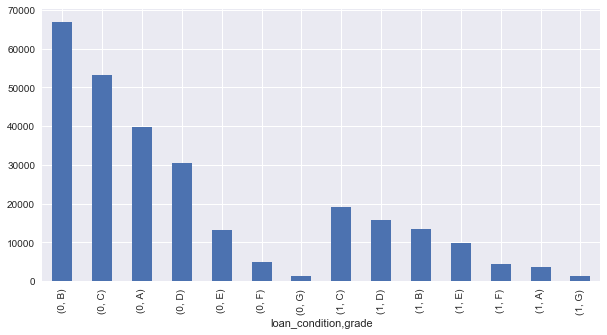

In [43]:
fig = plt.figure(figsize = (10,5));
df4.groupby('loan_condition').grade.value_counts().plot.bar()

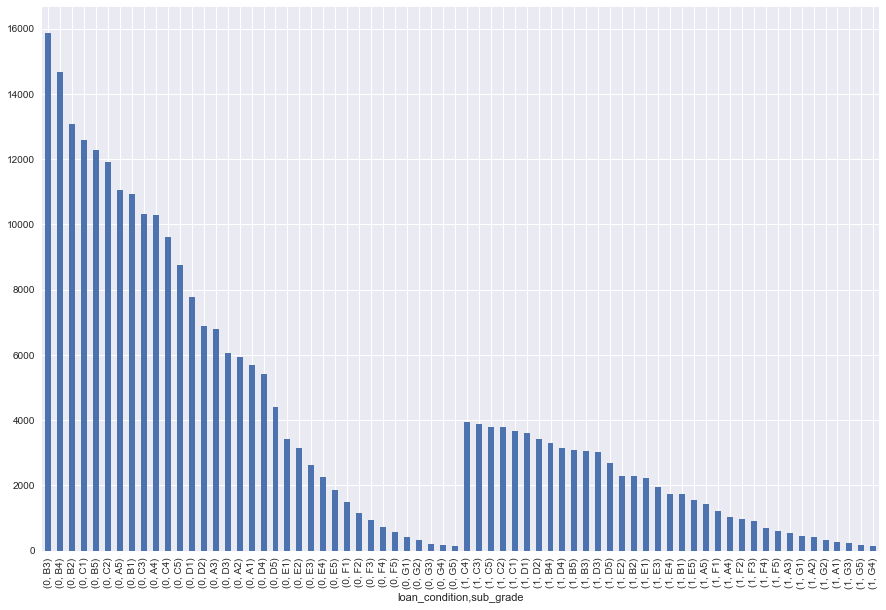

In [44]:
fig = plt.figure(figsize = (15,10));
df4.groupby('loan_condition').sub_grade.value_counts().plot.bar()


In [31]:
df4['loan_condition'].value_counts()

0    209711
1     67429
Name: loan_condition, dtype: int64

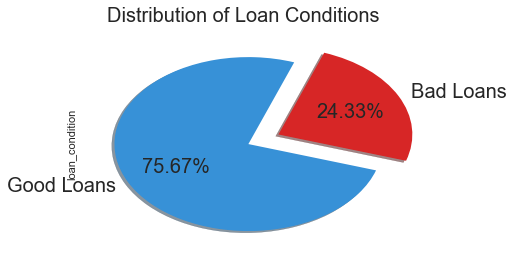

In [45]:

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

df4["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=20, startangle=70)
plt.suptitle('Distribution of Loan Conditions', fontsize=20)


### Apply Log-Transformation to skewed numeric variables

In [46]:
logtransform_df=df4.drop(['loan_status'],axis=1)
skewed_cols=['annual_inc', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 
       'collections_12_mths_ex_med',  'acc_now_delinq',
        'revol_bal',
        'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 
       'last_pymnt_amnt']
logtransform_df[skewed_cols]=logtransform_df[skewed_cols].apply(lambda x: np.log(x + 1))

In [47]:
logtransform_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,loan_condition
0,5000.0,36 months,10.65,162.87,B,B2,10+ years,RENT,10.085851,Verified,...,8.517393,6.759336,0.000000,0.000000,0.000000,5.151093,0.0,INDIVIDUAL,0.0,0
1,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,10.308986,Source Verified,...,6.125689,6.078032,0.000000,4.771362,0.746688,4.792977,0.0,INDIVIDUAL,0.0,1
2,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,9.413526,Not Verified,...,7.783641,6.404650,0.000000,0.000000,0.000000,6.478371,0.0,INDIVIDUAL,0.0,0
3,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,10.803669,Source Verified,...,9.210440,7.700897,2.888704,0.000000,0.000000,5.881873,0.0,INDIVIDUAL,0.0,0
5,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,10.491302,Source Verified,...,8.517393,6.449490,0.000000,0.000000,0.000000,5.087782,0.0,INDIVIDUAL,0.0,0


### how the distribtions look like after log transformation?

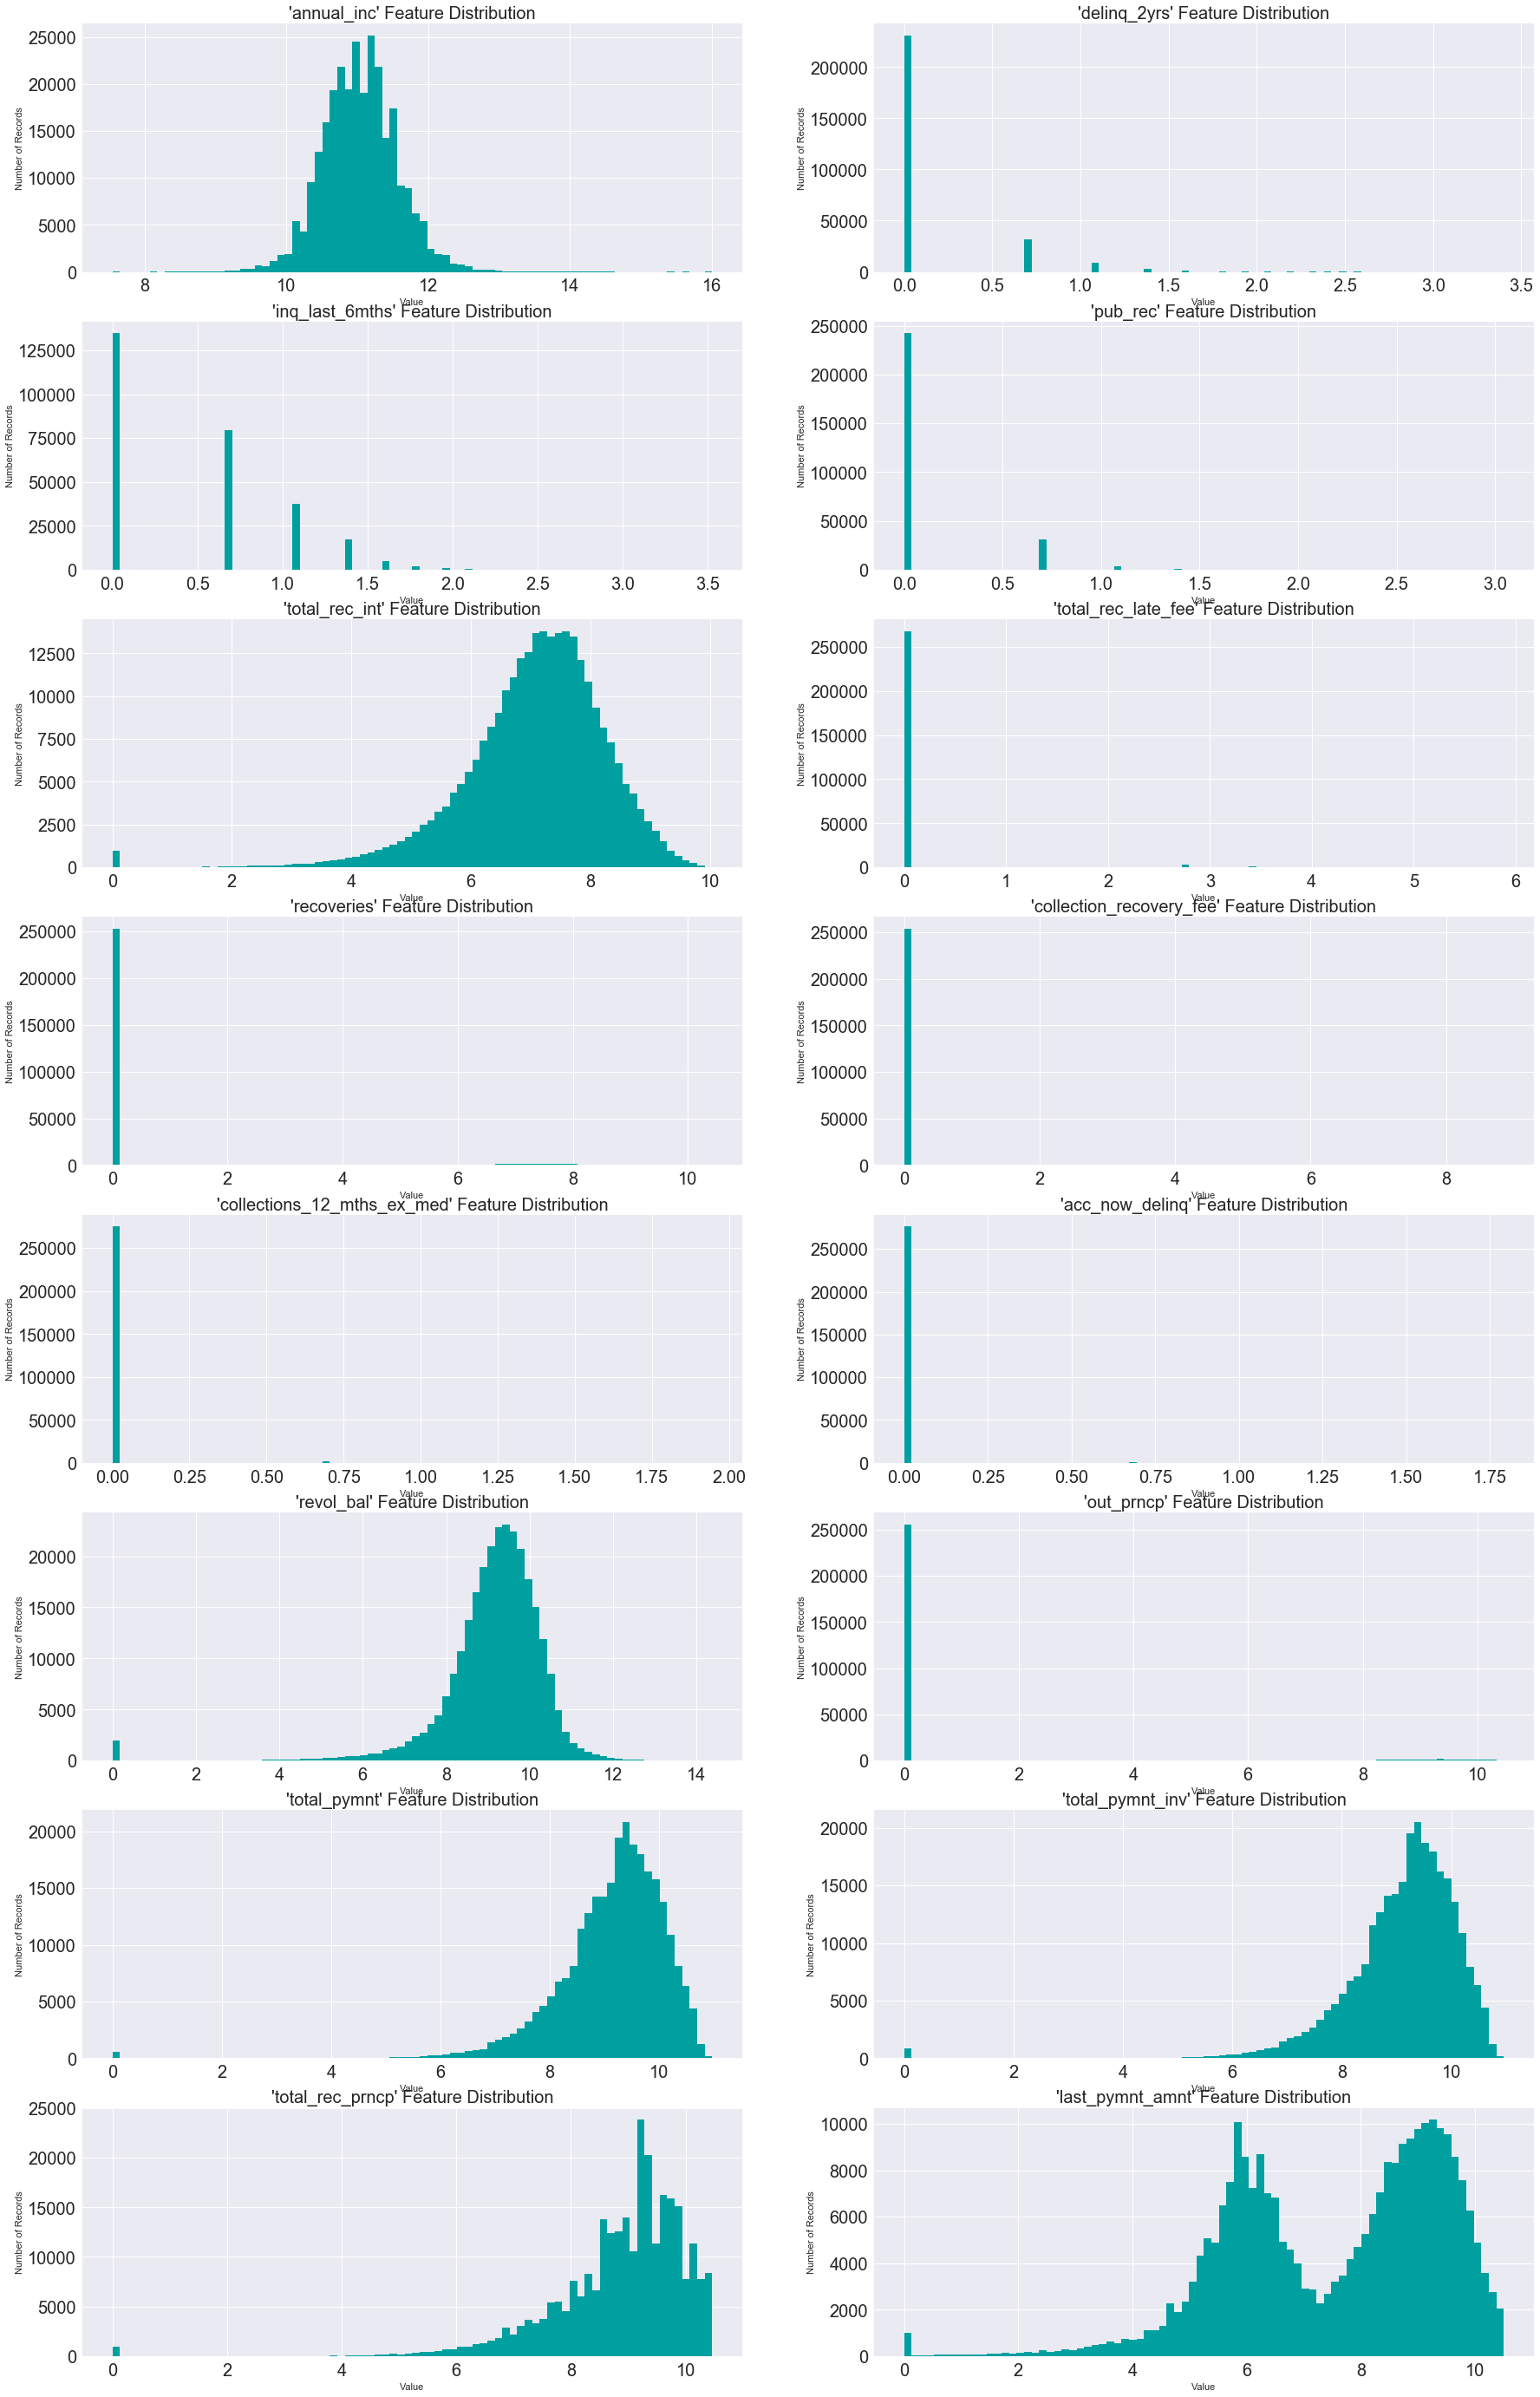

In [48]:
distribution(logtransform_df,skewed_cols)

### dummy coding categorical variables

In [49]:
logtransform_df.emp_length.value_counts()

10+ years    83918
2 years      25828
< 1 year     23210
3 years      22436
5 years      19518
1 year       18643
4 years      17660
6 years      15999
7 years      15281
8 years      13028
n/a          11101
9 years      10518
Name: emp_length, dtype: int64

In [50]:
dummy_transform_df=pd.get_dummies(logtransform_df.drop('sub_grade',axis=1) ,drop_first=True)
##sub_grade has 34 levels...one hot encoding will expand num of features by 34.
## since there is already grade in the dataset. let's drop it for now.

In [41]:
print(list(dummy_transform_df.columns))
print(dummy_transform_df.shape)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'loan_condition', 'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year', 'emp_length_n/a', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_impro

In [51]:
dummy_transform_df.isnull().sum().sort_values(ascending=False)
## numeric features still have na values. impute after train test split

revol_util                             253
collections_12_mths_ex_med             145
pub_rec                                 29
total_acc                               29
acc_now_delinq                          29
delinq_2yrs                             29
inq_last_6mths                          29
open_acc                                29
annual_inc                               4
loan_condition                           0
term_ 60 months                          0
grade_B                                  0
application_type_JOINT                   0
grade_C                                  0
collection_recovery_fee                  0
grade_D                                  0
grade_E                                  0
grade_F                                  0
last_pymnt_amnt                          0
total_rec_prncp                          0
recoveries                               0
total_rec_late_fee                       0
total_rec_int                            0
initial_lis

In [ ]:
dummy_transform_df.to_csv('clean training data.csv')

## Build model to predict bad loan
* the kernel is not stable, so I directly use the saved cvs file for the rest of the notebook

In [1]:
import pandas as pd
dummy_transform_df=pd.read_csv('./data/clean training data.csv', low_memory=False)

In [2]:
dummy_transform_df.drop('Unnamed: 0',axis=1,inplace=True) #drop index col

In [3]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(dummy_transform_df.drop('loan_condition',axis=1),\
                                                dummy_transform_df['loan_condition'], test_size=0.3,random_state=12)


In [4]:
print(train_y.value_counts()/len(train_y))
print(test_y.value_counts()/len(test_y))
## check if binary class labels are equivalent in training and test set

0    0.75642
1    0.24358
Name: loan_condition, dtype: float64
0    0.757343
1    0.242657
Name: loan_condition, dtype: float64


### impute missing values on training set 

In [5]:
import numpy as np
from sklearn.preprocessing import Imputer
imr=Imputer(missing_values=np.nan, strategy='median',axis=0)#If axis=0, then impute along columns.
train_x_clean=imr.fit_transform(train_x)

In [6]:
train_x_clean=pd.DataFrame(train_x_clean,columns=train_x.columns)
train_x_clean.shape

(193998, 63)

In [7]:
train_x_clean.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT
0,22925.0,6.62,703.89,11.146647,7.98,0.000000,0.693147,18.0,0.000000,10.437580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,18000.0,17.27,449.97,10.778977,15.08,0.000000,0.000000,8.0,0.000000,8.008033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,19000.0,19.91,502.44,10.571343,19.20,0.000000,0.000000,9.0,0.000000,9.212338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9125.0,16.59,323.48,9.952325,4.00,0.000000,1.609438,9.0,1.098612,7.183871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25000.0,12.85,840.55,11.884496,28.64,1.098612,0.000000,7.0,0.000000,10.554927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train_x_clean.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'emp_length_n/a',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_

In [7]:
numerical=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt','collections_12_mths_ex_med', 'acc_now_delinq']


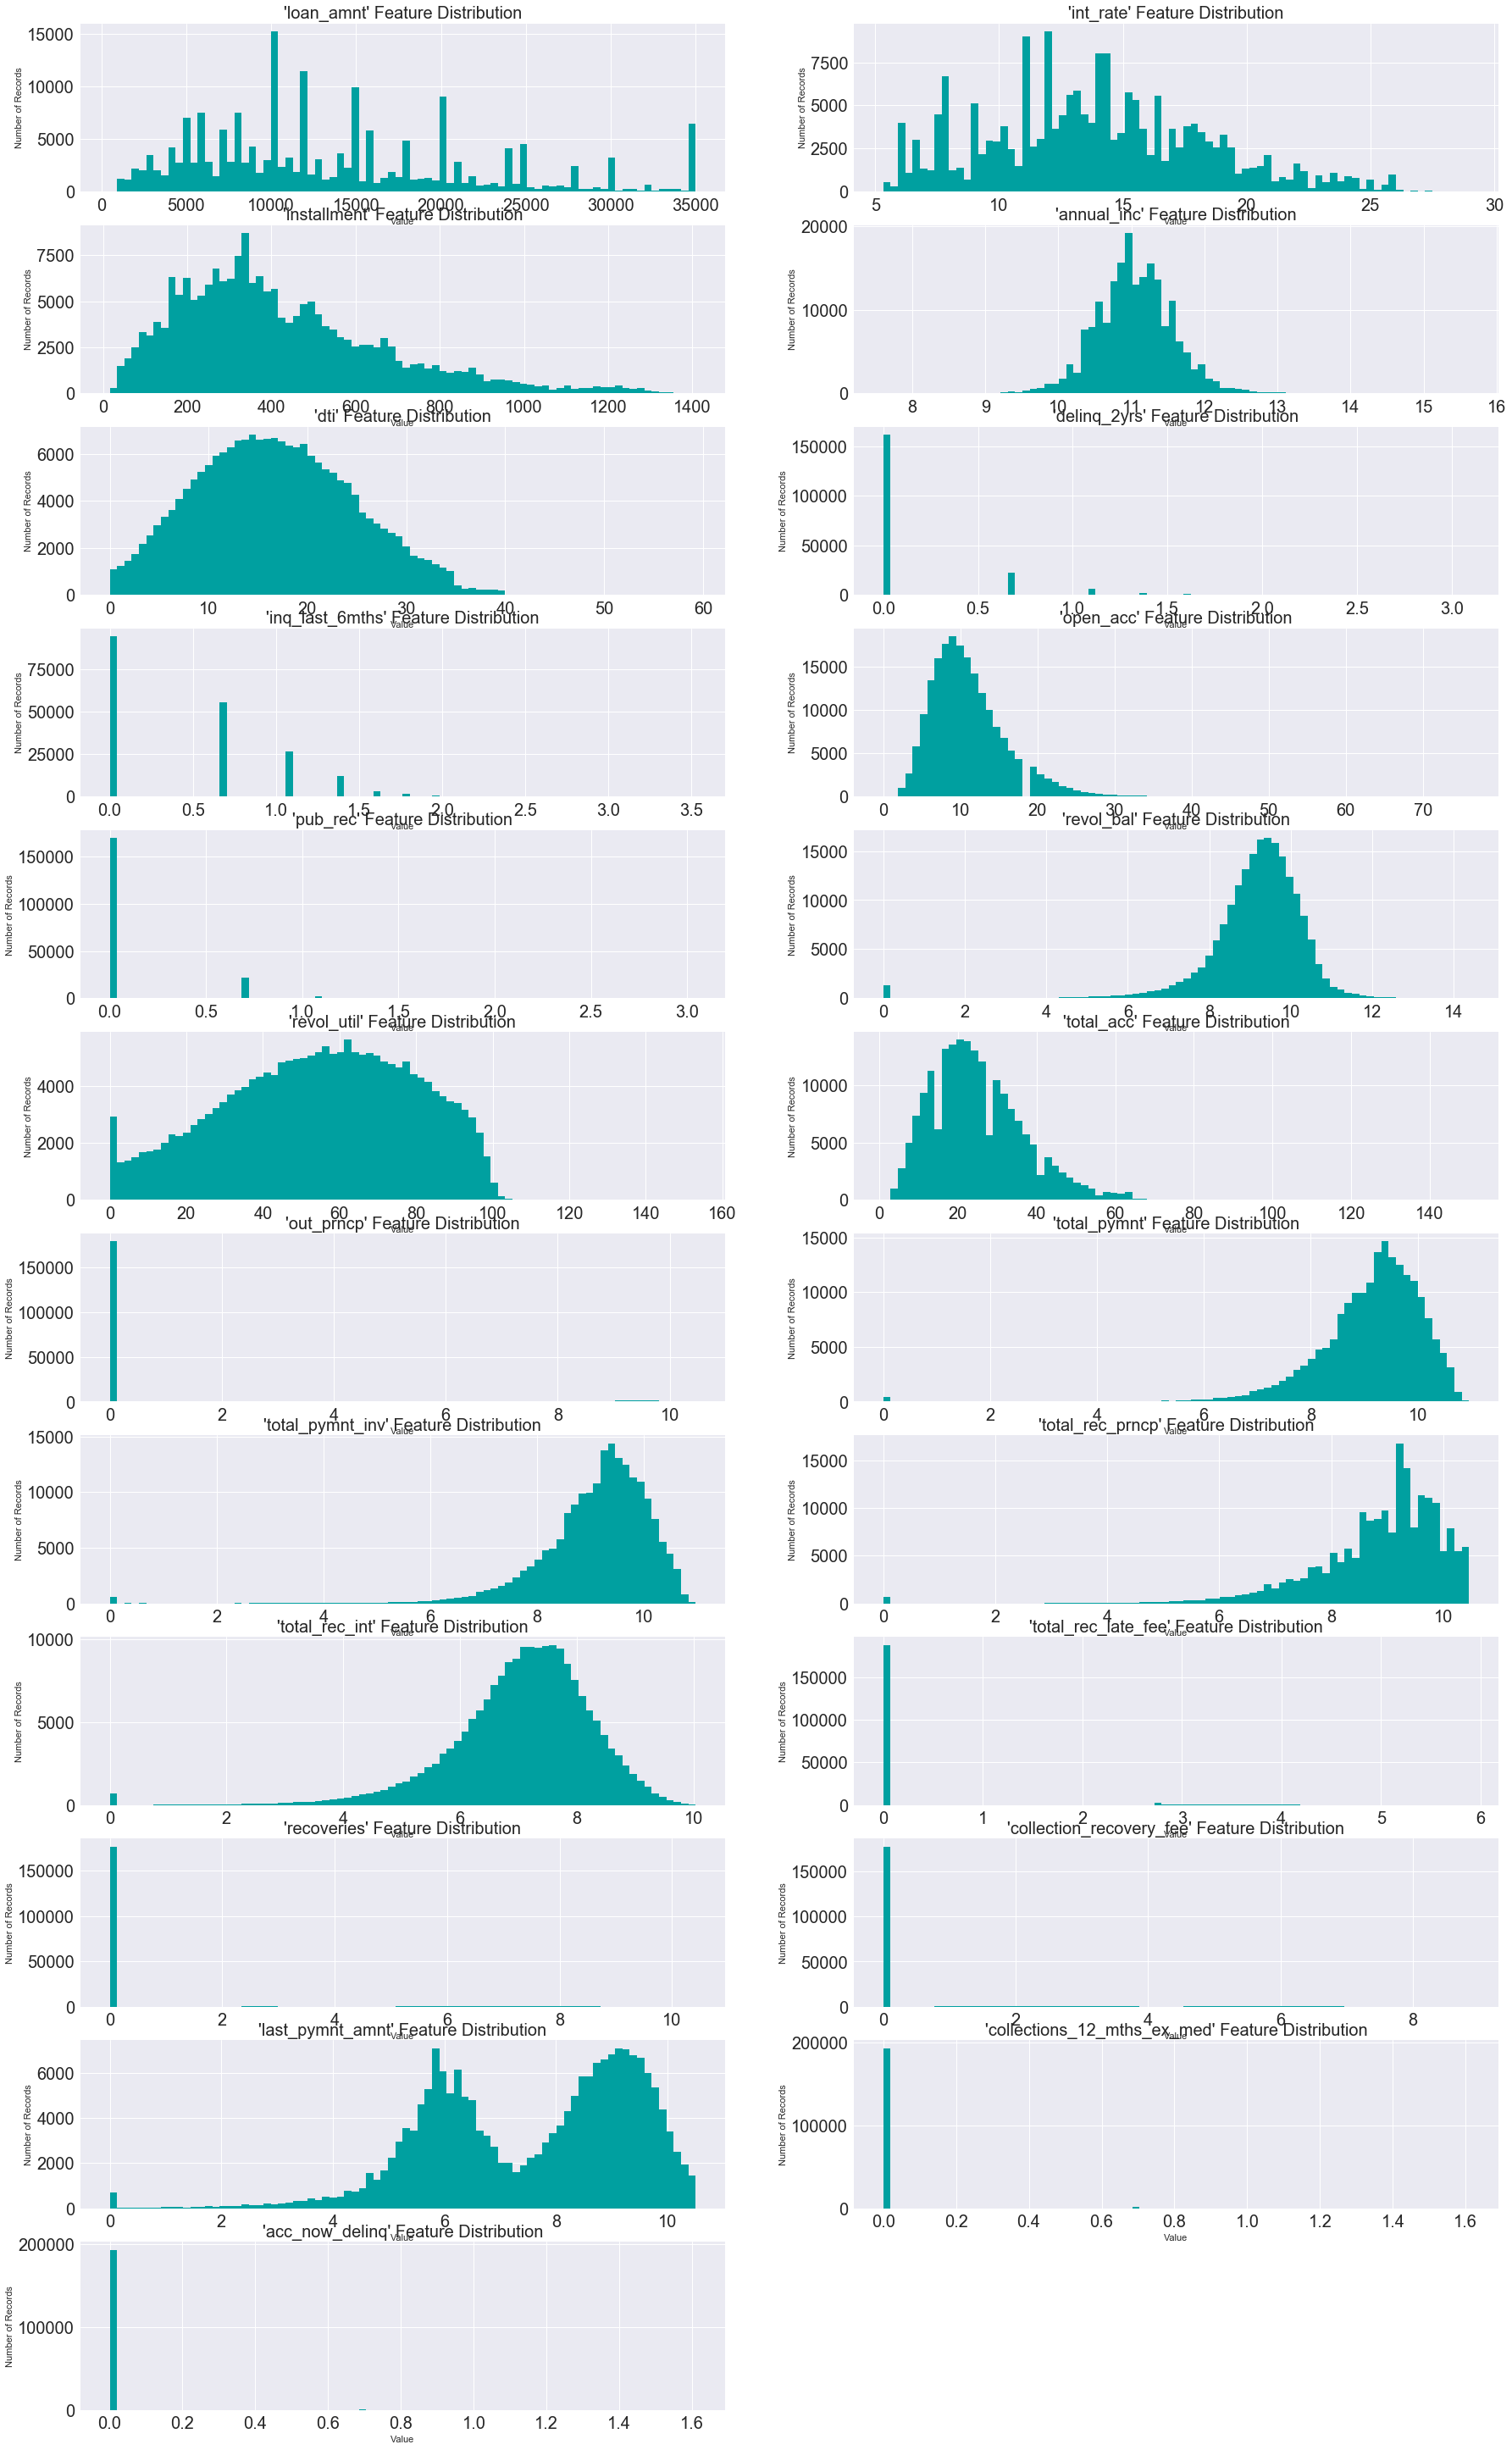

In [48]:
distribution(train_x_clean,numerical)

### standardize training set to bring all numeric features to the same scale

In [8]:
from sklearn.preprocessing import StandardScaler
#col_std=['loan_amnt','installment']
scaler=StandardScaler()
train_x_std=train_x_clean.copy()
train_x_std[numerical]=scaler.fit_transform(train_x_std[numerical])

In [9]:
train_x_std.columns
#train_x_std.head()

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'emp_length_n/a',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [14]:
lr_params={'C':[1,10,100],'penalty':['l1']}

In [15]:
logit=LogisticRegression(random_state=10)

In [16]:
logit_grid=GridSearchCV(logit,lr_params,cv=5,scoring='roc_auc')

In [17]:
logit_grid.fit(train_x_std,train_y) 

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'penalty': ['l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [21]:
logit_grid.best_params_

{'C': 100, 'penalty': 'l1'}

In [18]:
best_logit=logit_grid.best_estimator_

In [19]:
logit_grid.cv_results_
logit_grid.best_score_

0.99863301102149238

In [20]:
best_logit.fit(train_x_std,train_y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
coef_df=pd.Series(best_logit.coef_[0], index=train_x_std.columns).sort_values(ascending=False)

In [41]:
coef_df[abs(coef_df)<=0.25].sort_values(ascending=False)

purpose_debt_consolidation             0.209730
emp_length_4 years                     0.191468
total_rec_late_fee                     0.170117
purpose_medical                        0.167393
purpose_credit_card                    0.165309
emp_length_3 years                     0.125138
emp_length_2 years                     0.117289
total_acc                              0.109899
emp_length_< 1 year                    0.107067
purpose_wedding                        0.090296
purpose_vacation                       0.088859
revol_bal                              0.071168
collections_12_mths_ex_med             0.071127
dti                                    0.068783
pub_rec                                0.061039
purpose_home_improvement               0.040519
open_acc                               0.031355
acc_now_delinq                         0.004119
application_type_JOINT                 0.000000
inq_last_6mths                        -0.008715
delinq_2yrs                           -0

### remaining outstanding principal for total amount funded (out_prncp) seems to play a big role in logistic model to classify bad loan from good ones.

(array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 10 Text xticklabel objects>)

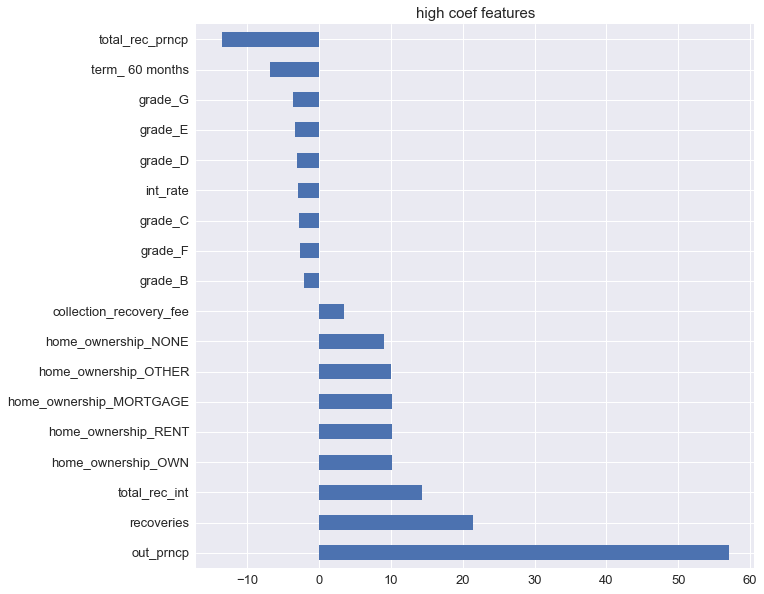

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
fig = plt.figure(figsize = (10,10));
high_coef=coef_df[abs(coef_df)>2].sort_values(ascending=False)
high_coef.plot.barh()
plt.title('high coef features',fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)


(array([-0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,
         0.075,  0.1  ]), <a list of 10 Text xticklabel objects>)

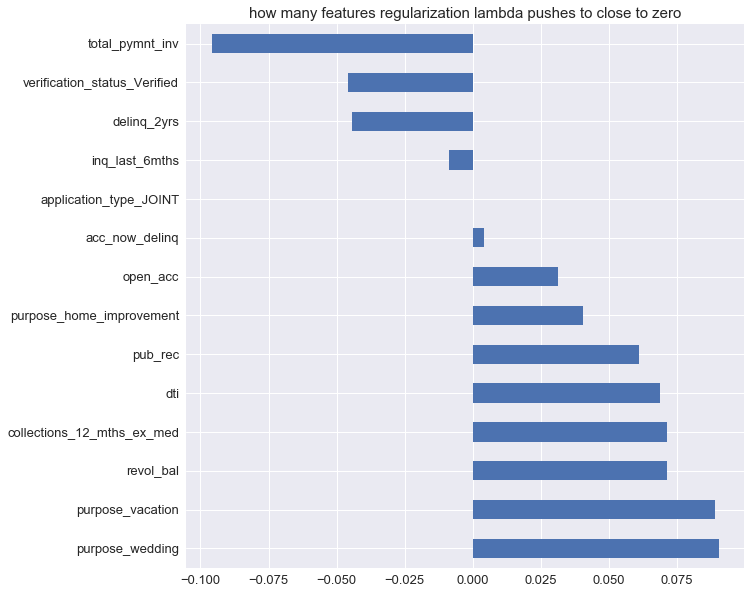

In [48]:
fig = plt.figure(figsize = (10,10));
least_imp_20=coef_df[abs(coef_df)<=0.1].sort_values(ascending=False)
least_imp_20.plot.barh()
plt.title('how many features regularization lambda pushes to close to zero',fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

In [11]:
test_x_clean=imr.transform(test_x)
test_x_std=pd.DataFrame(test_x_clean,columns=test_x.columns)
test_x_std[numerical]=scaler.transform(test_x_std[numerical])

In [64]:
y_pred_logit=best_logit.predict(test_x_std)
y_prob_logit=best_logit.predict_proba(test_x_std)[:,1]

In [66]:
y_prob_logit

array([  1.00000000e+00,   2.57012102e-03,   1.00000000e+00, ...,
         7.10717991e-06,   1.42196388e-04,   1.70848025e-10])

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [13]:
def model_performance (model, true_label, predicted_label):
    print(classification_report(true_label,predicted_label))
    print('roc_auc_score for '+ model +' model is {}'.format(roc_auc_score(true_label,predicted_label)))
    print('log_loss for '+ model +' model is {}'.format(log_loss(true_label,predicted_label)))
    print('recall_score for '+ model +' model is {}'.format(recall_score(true_label,predicted_label)))
    print(confusion_matrix(true_label,predicted_label))

In [59]:
model_performance('Logistic Regression',test_y,y_pred_logit)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     62967
          1       0.99      0.99      0.99     20175

avg / total       0.99      0.99      0.99     83142

roc_auc_score for Logistic Regression model is 0.9915645316780378
log_loss for Logistic Regression model is 0.17696975648298377
recall_score for Logistic Regression model is 0.9851301115241635
[[62841   126]
 [  300 19875]]


In [14]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
def plot_roc_curve(y_test, y_test_prob, model):
    #fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_prob)
    #roc_auc_train = auc(fpr, tpr)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    #plot roc curve
    plt.figure()
    plt.title('Receiver Operating Characteristic of ' + model)
    #plt.plot(fpr, tpr, 'b', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, 'r', label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

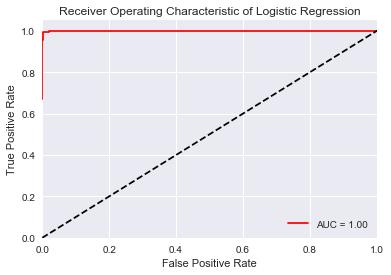

In [76]:
plot_roc_curve(test_y,y_prob_logit,'Logistic Regression') # too good to be true....

### prepare the current loan data set for real prediction

In [15]:
cur_loan=pd.read_csv('./data/current and new loan.csv',low_memory=False)

In [16]:
cur_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,loan_condition
0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,2233.10,1009.07,0.0,0.0,0.0,67.79,0.0,INDIVIDUAL,0.0,0
1,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,...,5110.85,3025.99,0.0,0.0,0.0,170.08,0.0,INDIVIDUAL,0.0,0
2,10000.0,60 months,15.96,242.97,C,C5,2 years,RENT,29120.0,Verified,...,7304.67,4317.69,0.0,0.0,0.0,242.97,0.0,INDIVIDUAL,0.0,0
3,12500.0,60 months,12.69,282.44,B,B5,1 year,RENT,27000.0,Verified,...,9306.87,4199.67,0.0,0.0,0.0,282.44,0.0,INDIVIDUAL,0.0,0
4,17500.0,60 months,17.27,223.74,D,D3,6 years,RENT,40000.0,Verified,...,6487.75,4225.77,0.0,0.0,0.0,223.74,0.0,INDIVIDUAL,0.0,0


In [18]:
cur_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'loan_condition'],
      dtype='object')

In [19]:
cur_loan['loan_status'].value_counts()

Current    601779
Issued       8460
Name: loan_status, dtype: int64

#### apply the same log transformation and imputation and standardscaler to the data set

In [17]:
#cur_loan.drop(['sub_grade','loan_status'],axis=1,inplace=True)
skewed_cols=['annual_inc', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 
       'collections_12_mths_ex_med',  'acc_now_delinq',
        'revol_bal',
        'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 
       'last_pymnt_amnt']
cur_loan[skewed_cols]=cur_loan[skewed_cols].apply(lambda x: np.log(x + 1))

In [18]:
cur_loan_dummy=pd.get_dummies(cur_loan.drop(['sub_grade','loan_status','loan_condition'],axis=1),drop_first=True)

In [19]:
cur_loan_dummy.shape

(610239, 63)

In [20]:
cur_loan_clean=imr.transform(cur_loan_dummy)
cur_loan_std=pd.DataFrame(cur_loan_clean,columns=cur_loan_dummy.columns)
cur_loan_std[numerical]=scaler.transform(cur_loan_std[numerical])

In [24]:
cur_loan_std.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT
0,-1.304479,-0.279263,-1.435276,0.467919,0.148894,-0.415942,-0.925827,0.810346,-0.366174,0.848175,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.815297,0.460773,-1.019149,-0.550617,0.854793,-0.415942,0.396494,-0.807960,-0.366174,0.499421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.448410,0.460773,-0.722624,-1.467659,0.768615,-0.415942,0.396494,0.001193,-0.366174,0.427546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.142672,-0.279263,-0.562056,-1.612429,-0.091898,-0.415942,1.718815,-1.010248,-0.366174,0.066202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.468806,0.757239,-0.800854,-0.859652,0.342795,-0.415942,0.396494,-1.212536,-0.366174,0.109427,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### test the best_logit on current loan data

In [120]:
cur_pred=best_logit.predict(cur_loan_std)
cur_prob=best_logit.predict_proba(cur_loan_std)[:,1]

In [130]:
np.unique(cur_pred,return_counts=True)

(array([0, 1]), array([    67, 610172]))

### why the model predict almost all the current and new loans are bad loans?
* if we look at the high coef features from the best_logit model. the highest coef feature is out_prncp -- the outstanding loan amount left to be paid. new and current loans always have high oustanding balance. so model see them all bad...
* solution is to exclude the features specific to loan payment and outstanding amount that will highly affect the model classification 

In [15]:
delete_col=['out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
train_x_streamlined=pd.DataFrame(train_x_std,columns=[i for i in train_x_std.columns if i not in delete_col] )

In [16]:
train_x_streamlined.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'term_ 60 months',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'emp_length_n/a', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose

In [22]:
lr=LogisticRegression(C=100, penalty='l1')
lr.fit(train_x_streamlined,train_y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
test_x_streamlined=pd.DataFrame(test_x_std,columns=[i for i in test_x_std if i not in delete_col])

In [27]:
y_pred_lr=lr.predict(test_x_streamlined)
y_prob_lr=lr.predict_proba(test_x_streamlined)[:,1]

In [24]:
model_performance('logit',test_y,y_pred_lr)

             precision    recall  f1-score   support

          0       0.91      0.93      0.92     62967
          1       0.75      0.70      0.73     20175

avg / total       0.87      0.87      0.87     83142

roc_auc_score for logit model is 0.8134309498165765
log_loss for logit model is 4.421765198114634
recall_score for logit model is 0.6996778190830235
[[58382  4585]
 [ 6059 14116]]


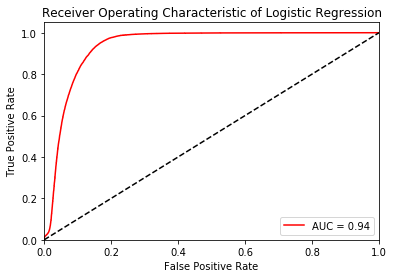

In [28]:
plot_roc_curve(test_y,y_prob_lr,'Logistic Regression')

In [31]:
coef_lr2=pd.Series(lr.coef_[0], index=train_x_streamlined.columns)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

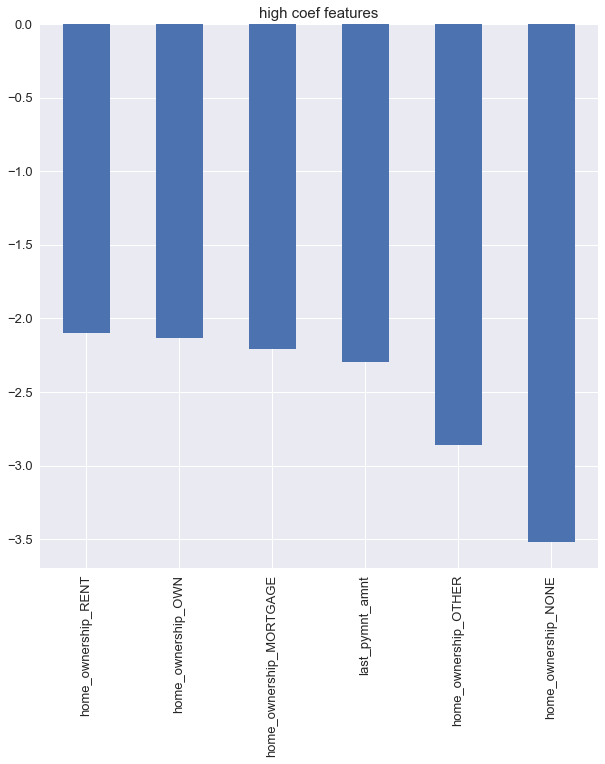

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
fig = plt.figure(figsize = (10,10));
high_coef=coef_lr2[abs(coef_lr2)>2].sort_values(ascending=False)
high_coef.plot.bar()
plt.title('high coef features',fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators=100,max_depth=10,  #min_samples_leaf=5,
                            oob_score=True,random_state=10)
rfc1.fit(train_x_streamlined,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)

In [59]:
rfc1.oob_score_

0.88789059681027638

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

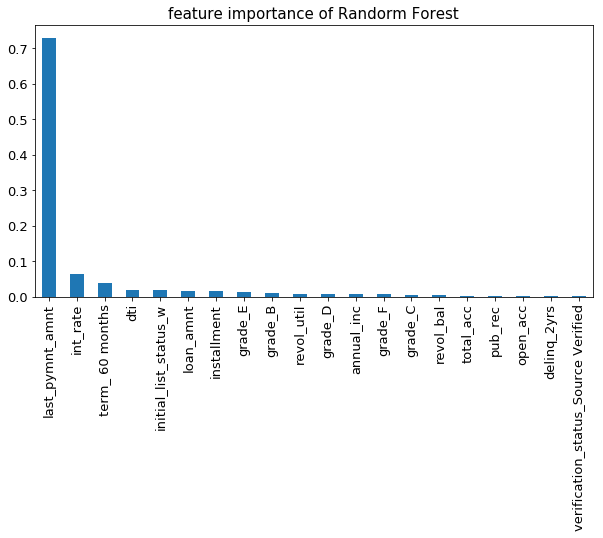

In [40]:
% matplotlib inline
feature_importance=pd.Series(rfc1.feature_importances_ , index=train_x_streamlined.columns).sort_values(ascending=False)
fig = plt.figure(figsize = (10,5));
top_25_feat=feature_importance[:20]
top_25_feat.plot.bar()
plt.title('feature importance of Randorm Forest',fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
#plt.show()

In [60]:
rfc_pred=rfc1.predict(test_x_streamlined)
rfc_prob=rfc1.predict_proba(test_x_streamlined)[:,1]

In [61]:
model_performance('Random Forest',test_y,rfc_pred)

             precision    recall  f1-score   support

          0       0.90      0.96      0.93     62967
          1       0.85      0.66      0.74     20175

avg / total       0.89      0.89      0.88     83142

roc_auc_score for Random Forest model is 0.8127644178755817
log_loss for Random Forest model is 3.8310187068673183
recall_score for Random Forest model is 0.6644857496902107
[[60514  2453]
 [ 6769 13406]]


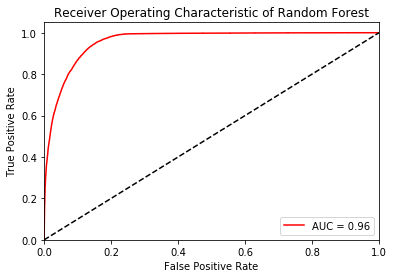

In [62]:
plot_roc_curve(test_y,rfc_prob,'Random Forest')

In [63]:
cur_loan_std_streamlined=pd.DataFrame(cur_loan_std,columns=[i for i in test_x_std if i not in delete_col])
rfc_pred_cur=rfc.predict(cur_loan_std_streamlined)
rfc_prob_cur=rfc.predict_proba(cur_loan_std_streamlined)[:,1]

### Let look at how Random Forest model predict the unseen current loan data!

In [64]:
np.unique(rfc_pred_cur,return_counts=True)

(array([0, 1]), array([248068, 362171]))

In [65]:
np.unique(rfc_pred_cur,return_counts=True)[1]/len(rfc_pred_cur)*100

array([ 40.65095807,  59.34904193])

#### the Random Forest model predicts 41% of the current loan is good, 59% will turn bad.
when random forest model is tuned to >0.96 oob_score, accuracy and auc are very high but it predicts the current and new loan to be mostly bad loans (~72%), which is not likely. it seems when random forest model perform well on the training set, the model can be overfitting. so I simplified the model parameters to be only on max_depth.. then the model predicts 59% bad loan on the current loan dataset, which is still higher than expected. but bettern than before.

## Now let's try the last model--- Gradient Boosting Tree

In [34]:
import xgboost as xgb

In [35]:
train_x_streamlined.rename(columns={'emp_length_< 1 year':'emp_length_less than 1 year'}, inplace=True)
train_x_streamlined.rename(columns={'emp_length_10+ years':'emp_length_more than 10 year'}, inplace=True)
## have to rename the column name because xgb dmatrix does not take feature name with "<" or ","

In [36]:
train_x_std.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'emp_length_n/a',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_

In [69]:
TrainDMatrix=xgb.DMatrix(data=train_x_std.values,label=train_y)

In [70]:
#cv_params = {"objective":"reg:logistic",'eta': 0.1,'subsample':0.8,'alpha':10, 'colsample_bytree': 0.8 }


In [ ]:
#cv_result=xgb.cv(params=cv_params,dtrain=TrainDMatrix, nfold=4, metrics = {'auc'},num_boost_round=15,early_stopping_rounds=4,as_pandas=True, seed=123)

In [37]:
from sklearn.model_selection import GridSearchCV
xgb_class=xgb.XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=6,subsample=0.8,colsample_bytree=0.8\
                            ,reg_alpha=10)
                           
#xgb_grid=GridSearchCV(estimator=xgb_class,param_grid=param_grid,scoring='roc_auc',cv=3)

In [ ]:
xgb_class.fit(train_x_streamlined,train_y,eval_metric=['auc'])

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline
feature_importance=pd.Series(xgb_class.feature_importances_ , index=train_x_streamlined.columns).sort_values(ascending=False)
fig = plt.figure(figsize = (10,5));
top_20_feat=feature_importance[:20]
top_20_feat.plot.bar()
plt.title('feature importance of Gradient Boosting Tree',fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

In [34]:
test_x_streamlined.rename(columns={'emp_length_< 1 year':'emp_length_less than 1 year'}, inplace=True)
test_x_streamlined.rename(columns={'emp_length_10+ years':'emp_length_more than 10 year'}, inplace=True)
## have to rename the column name because xgb dmatrix does not take feature name with "<" or ","
TestDmatrix=xgb.DMatrix(test_x_streamlined,test_y)

In [35]:
xbg_pred=xgb_class.predict(test_x_streamlined)
y_test_xbg_prob=xgb_class.predict_proba(test_x_streamlined)[:,1]

In [36]:
model_performance('Gradient Boosting Tree',test_y,xbg_pred)


             precision    recall  f1-score   support

          0       0.95      0.95      0.95     62967
          1       0.85      0.84      0.84     20175

avg / total       0.92      0.92      0.92     83142

roc_auc_score for Gradient Boosting Tree model is 0.8967847854216195
log_loss for Gradient Boosting Tree model is 2.6022150693293695
recall_score for Gradient Boosting Tree model is 0.8426270136307311
[[59878  3089]
 [ 3175 17000]]


In [ ]:
plot_roc_curve(test_y,y_test_xbg_prob,'Gradient Boosting Tree')